# Student Performance Indicator

## Life Cycle of Machine Learning Project
- understanding the problem statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-processing
- Model Training
- Choose best model

#### Data checks during Exploratory Data Analysis (EDA):

**I. Data Structure & Foundation:**

1. **Data Shape & Structure:**
    * **Purpose:** Understand the dimensions of your data (rows = samples/observations, columns = features/variables).  Crucial for memory management and algorithm compatibility.
    * **Why:**  Different algorithms work better with different data shapes.  Knowing the dimensions helps you anticipate potential issues.
2. **Data Types:**
    * **Purpose:** Identify the type of data in each column (numeric, categorical, text, date/time, etc.).
    * **Why:**  Data type determines which statistical methods and visualizations are appropriate.  Incorrect data types can lead to errors or misinterpretations.

**II. Data Completeness & Quality:**

3. **Missing Values:**
    * **Purpose:** Determine which features have missing data and the extent of missingness.
    * **Why:** Missing data can bias analyses and affect model performance.  Understanding the pattern of missing data is crucial for deciding how to handle it (imputation or removal).
4. **Data Quality:**
    * **Purpose:** Identify inconsistencies, errors, or invalid data entries.
    * **Why:**  "Garbage in, garbage out."  Data quality issues can lead to misleading insights and poor model performance.  Examples include typos, inconsistent formatting, impossible values (e.g., negative age), etc.
5. **Duplicates:**
    * **Purpose:** Detect and remove duplicate rows or columns.
    * **Why:** Duplicates can inflate counts, skew statistics, and mislead models by giving them the same information multiple times.

**III. Data Distribution & Characteristics:**

6. **Data Distributions:**
    * **Purpose:** Understand the distribution of individual features.
    * **Why:**  Distribution shapes (normal, skewed, uniform, etc.) influence the choice of statistical tests and preprocessing techniques.  Identifying unusual distributions can reveal outliers or data errors.
7. **Outliers:**
    * **Purpose:** Identify extreme values that deviate significantly from the rest of the data.
    * **Why:** Outliers can skew statistics, inflate variance, and negatively impact model performance.  They might be genuine extreme values or errors that need correction.
8. **Feature Cardinality (Categorical):**
    * **Purpose:** Count the number of unique categories in each categorical feature.
    * **Why:** High cardinality can create problems for some machine learning algorithms.  It can lead to a "curse of dimensionality" and make models more complex.
9. **Class Imbalance (Classification):**
    * **Purpose:** Check if the classes in the target variable are represented equally.
    * **Why:** Imbalanced classes can bias models towards the majority class.  Techniques like oversampling, undersampling, or cost-sensitive learning might be needed.

**IV. Relationships & Dependencies:**

10. **Feature Relationships:**
    * **Purpose:** Explore relationships between features.
    * **Why:**  Understanding feature relationships can help in feature selection, feature engineering, and model selection.  Highly correlated features might be redundant.
11. **Target Variable Analysis (Supervised Learning):**
    * **Purpose:** Understand the distribution of the target variable and its relationship with the features.
    * **Why:** This is the core of supervised learning.  Understanding how features relate to the target variable guides feature engineering and model selection.
12. **Time-Based Dependencies (Time Series):**
    * **Purpose:** Identify patterns related to time.
    * **Why:** Time series data often has specific characteristics like seasonality, trends, and autocorrelation that need to be accounted for in modeling.
13. **Spatial Dependencies (Geographic):**
    * **Purpose:** Discover spatial relationships and patterns.
    * **Why:** Geographic data can exhibit spatial autocorrelation, meaning that nearby values are more similar than distant values. This needs to be considered in analysis and modeling.

**V. Data Integrity & Project Goals:**

14. **Data Leakage:**
    * **Purpose:** Ensure that no information from the future or test set is leaking into the training data.
    * **Why:** Data leakage leads to overly optimistic but unrealistic model performance.  It's a critical error that can invalidate your entire project.
15. **Data Drift:**
    * **Purpose:** Compare new data to the original training data to detect changes in distribution.
    * **Why:** If the data distribution changes significantly, your model might become less accurate.  This indicates the need for model retraining.
16. **Text Data Specifics (NLP):**
    * **Purpose:**  Prepare and understand text data for NLP tasks.
    * **Why:** Text data requires specific preprocessing steps like tokenization, stop word removal, and stemming/lemmatization before it can be used in machine learning models.
17. **Domain-Specific Knowledge:**
    * **Purpose:** Apply domain expertise to interpret EDA results and make informed decisions.
    * **Why:**  Domain knowledge is essential for understanding the context of the data and identifying meaningful patterns.  It often guides the focus of EDA.
18. **Reproducibility:**
    * **Purpose:** Ensure that your EDA process can be easily replicated.
    * **Why:** Reproducibility is crucial for scientific rigor and collaboration.  It allows others (or your future self) to verify your findings.
19. **Iteration:**
    * **Purpose:** Recognize that EDA is an ongoing process.
    * **Why:**  As you learn more about your data, you might need to revisit earlier steps and refine your analysis.
20. **Business Objectives:**
    * **Purpose:** Connect your EDA insights to the overall goals of your project.
    * **Why:** EDA should be driven by the business questions you are trying to answer.  Focus your analysis on the aspects of the data that are most relevant to your objectives.

By systematically addressing these points, you'll gain a deep understanding of your data, identify potential problems, and be well-prepared for the subsequent steps in your machine learning project.


## Problem Statement
- Understand how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, lunch and Test preparation course

## Data Collection:
- Kaggle link: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- Columns: 8, Records: 1000

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [5]:
data = pd.read_csv('./data/stud.csv')

In [6]:
# shape and structure
data.shape

(1000, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
data.test_preparation_course.unique()

array(['none', 'completed'], dtype=object)

### dataset columns and information

- gender : sex of students (Male/Female)
- race_ethnicity : students's ethnicity (Group A,B,C,D,E)
- parental_level_of_education : student's parent max education level (bachelor's degree, some college, master's degree, associate's degree, high school, some high school)
- lunch : food intake during lunch hours (standard, free/reduced)
- test_preparation_course : preparation course completed for test? (completed, none)
- math_score 
- reading_score 
- writing_score

## 3. Data Checks to perform
- check missing values
- check duplicates
- check data type
- check number of unique values in each column
- check statistics of data
- check various categories present in different categorical columns

In [23]:
# 3.1 Missing Values
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### No missing values in dataset

In [33]:
# 3.2 Duplicate Values
data.duplicated().sum()    # data.drop_duplicates() 

np.int64(0)

#### No Duplicate Values in dataset

In [ ]:
# 3.3 Data Types and Null
data.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# 3.4 check unique values wrt to each column
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [ ]:
# 3.5 check statistics
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


###### Insights
- There are 3 numerical columns: math_score, reading_score, writing_score
- All means are very close to each other in range : 66 to 68.05
- Standard Deviation are very close and falls between 14.6 to 15.19
- While minimum score for math is 0 but for writing it is much higher 10 and for writing it is highest 17

In [43]:
# 3.6 Unique values in categorical data
categorcial_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course']

for col in categorcial_columns:
    print(f'Categories in {col} variable: ', end=' ')
    print(data[col].unique(), end='\n\n')

Categories in gender variable:  ['female' 'male']

Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch variable:  ['standard' 'free/reduced']

Categories in test_preparation_course variable:  ['none' 'completed']



In [45]:
# define numerical and categorical features
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
f"numerical features: {numerical_features}, categorical features: {categorical_features}"

"numerical features: ['math_score', 'reading_score', 'writing_score'], categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']"

In [46]:
# adding total_Score and average columns
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['average'] = data['total_score'] / 3
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [49]:
# count max_score = 100
reading_100 = data[data['reading_score'] == 100]['reading_score'].count()
writing_100 = data[data['writing_score'] == 100]['writing_score'].count()
math_100 = data[data['math_score'] == 100]['math_score'].count()

print(f"Number of students scored 100 In:\nReading - {reading_100}\nWriting - {writing_100}\nMath - {math_100}")

Number of students scored 100 In:
Reading - 17
Writing - 14
Math - 7


In [50]:
# count score below 20
reading_20 = data[data['reading_score'] <= 20]['reading_score'].count()
writing_20 = data[data['writing_score'] <= 20]['writing_score'].count()
math_20 = data[data['math_score'] <= 20]['math_score'].count()

print(f"Number of students scored 100 In:\nReading - {reading_20}\nWriting - {writing_20}\nMath - {math_20}")

Number of students scored 100 In:
Reading - 1
Writing - 3
Math - 4


**Insights**
- Students have performed worst in maths
- Students have performed best in reading

## Data Visualization
- histogram
- kernel density estimator(KDE)

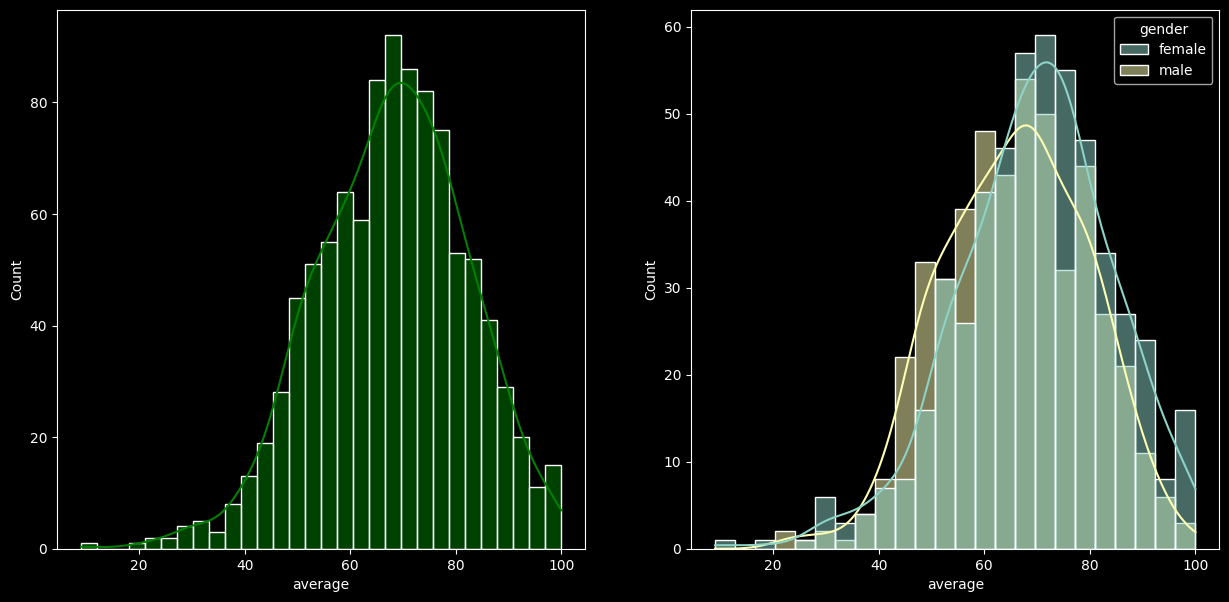

In [51]:
# 4.1.1 histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='average', kde=True, hue='gender')
plt.show()

- Female students tend to perform well than male students

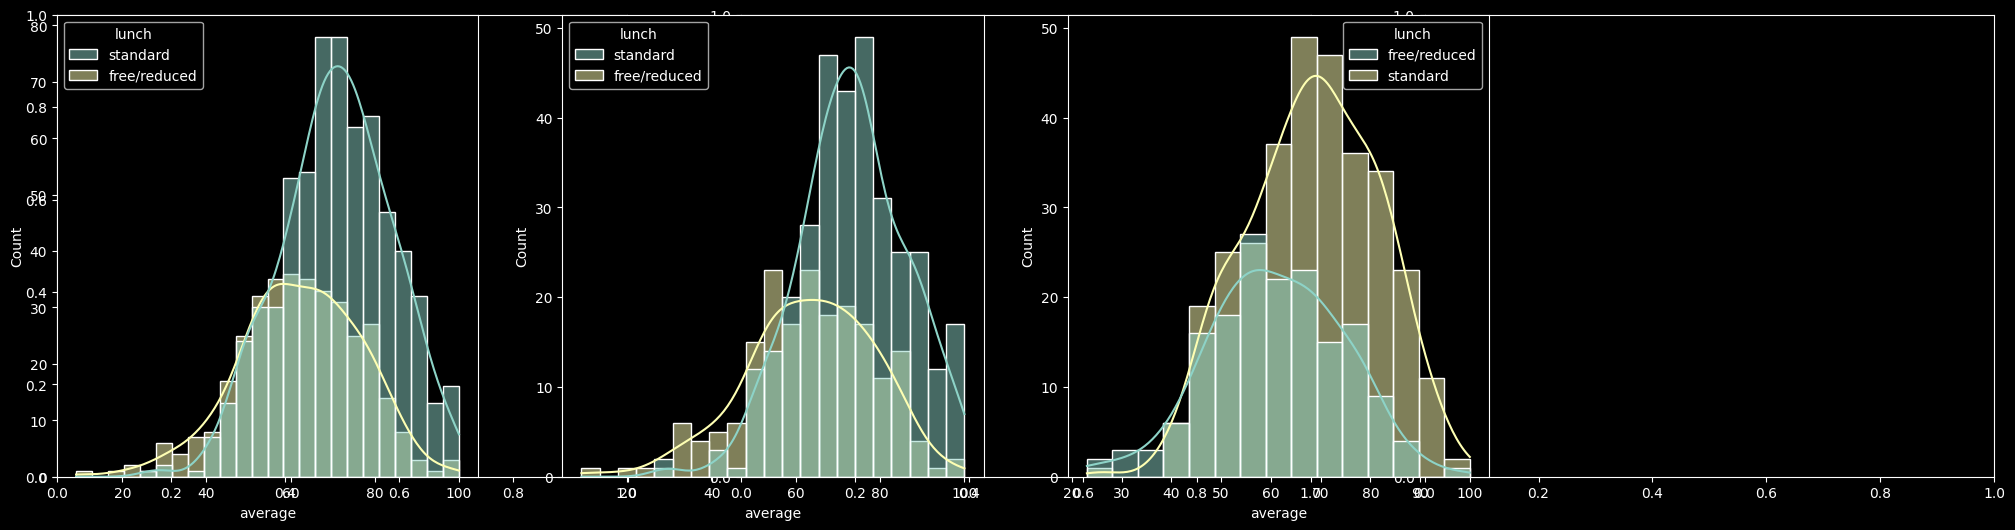

In [53]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=data, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender == 'male'], x='average', kde=True, hue='lunch')
plt.show()

- students with standard lunch tends to perform well in tests for both male and female

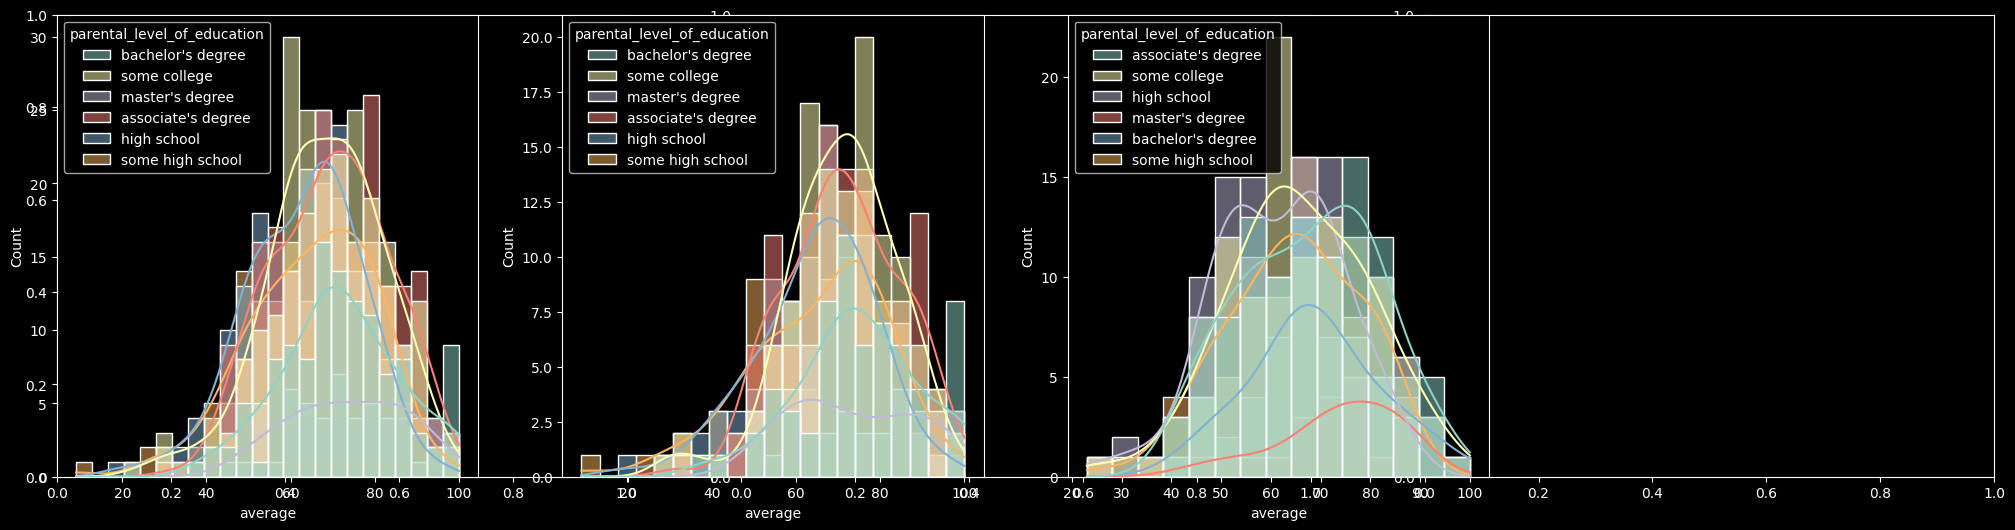

In [55]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=data, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(142)
ax = sns.histplot(data=data[data.gender == 'female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
ax = sns.histplot(data=data[data.gender == 'male'], x='average', kde=True , hue='parental_level_of_education')
plt.show()


- In General, Parents degree does not help students to perform well in exam
- 2nd plot no effect of parental education to female students performance
- 3rd plot shows that parent's whose education is associate/master's degree tends to perform well

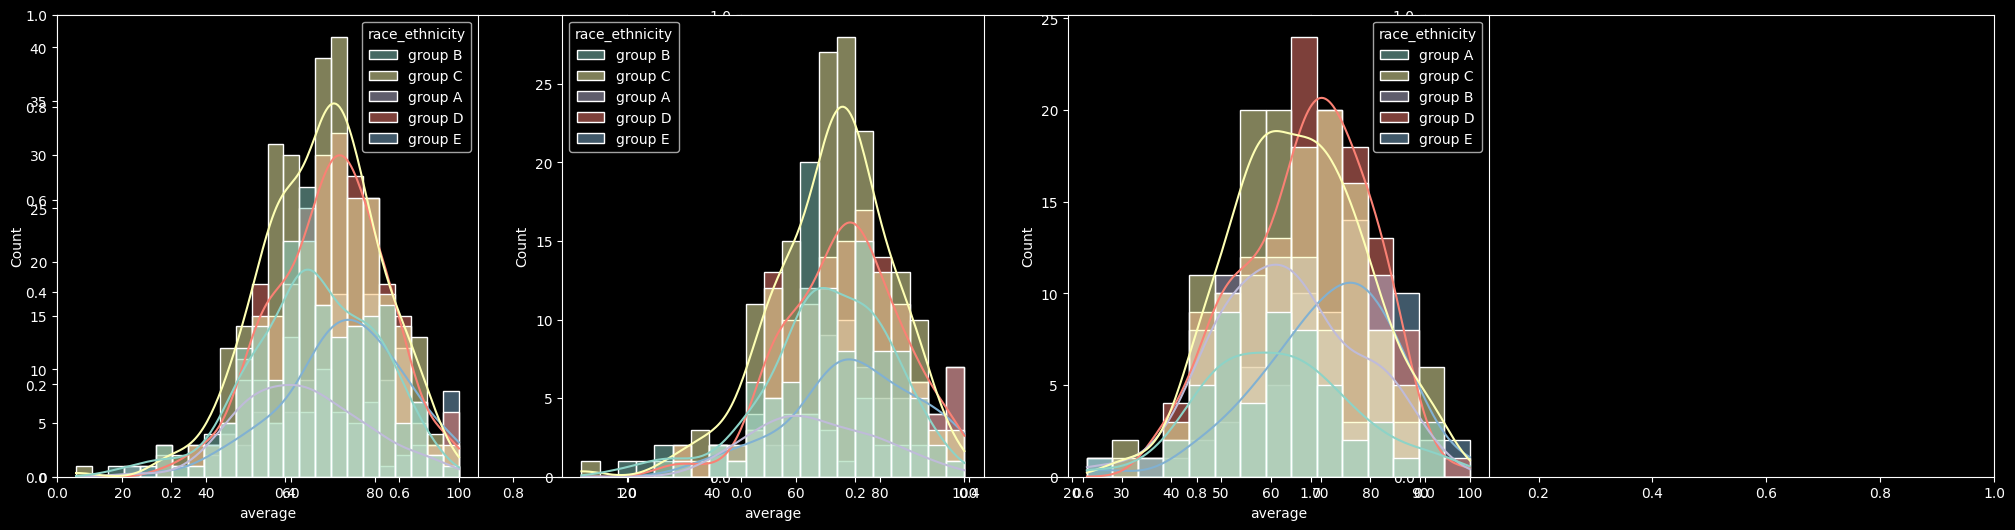

In [57]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=data, x='average', kde=True, hue='race_ethnicity')
plt.subplot(142)
ax = sns.histplot(data=data[data.gender == 'female'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(143)
ax = sns.histplot(data=data[data.gender == 'male'], x='average', kde=True , hue='race_ethnicity')
plt.show()


- students with ethnicity of group c and d usually performs well in exam

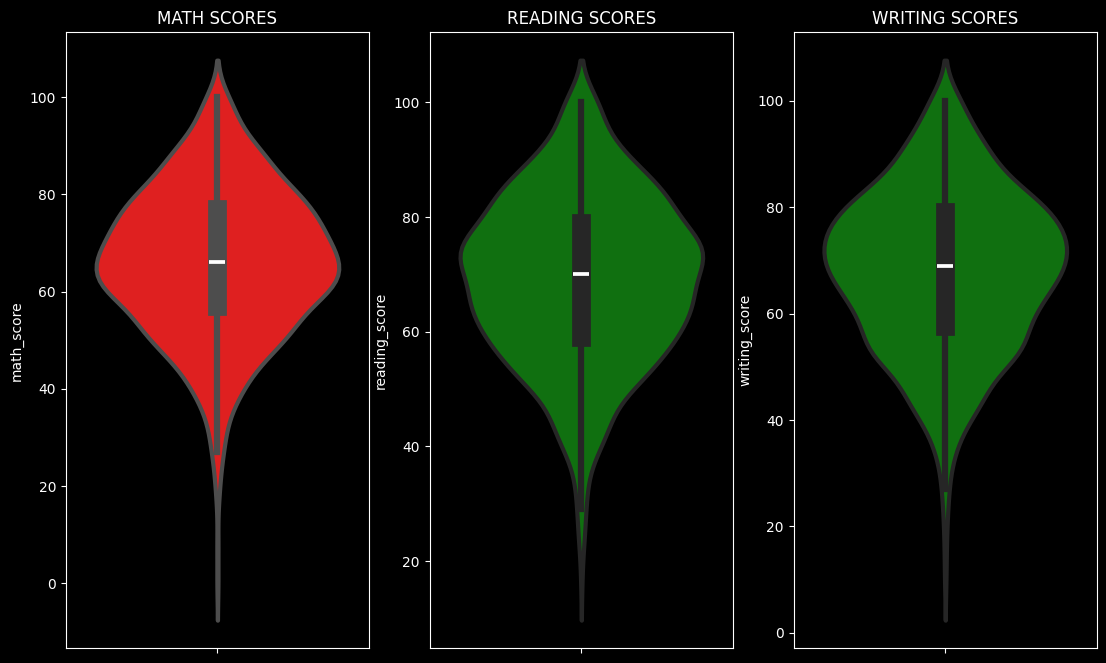

In [59]:
# maximum scores of students in all three subjects
plt.figure(figsize=(18, 8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=data, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y= 'reading_score', data=data, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y= 'writing_score', data=data, color='green', linewidth=3)
plt.show()

**Insights**
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

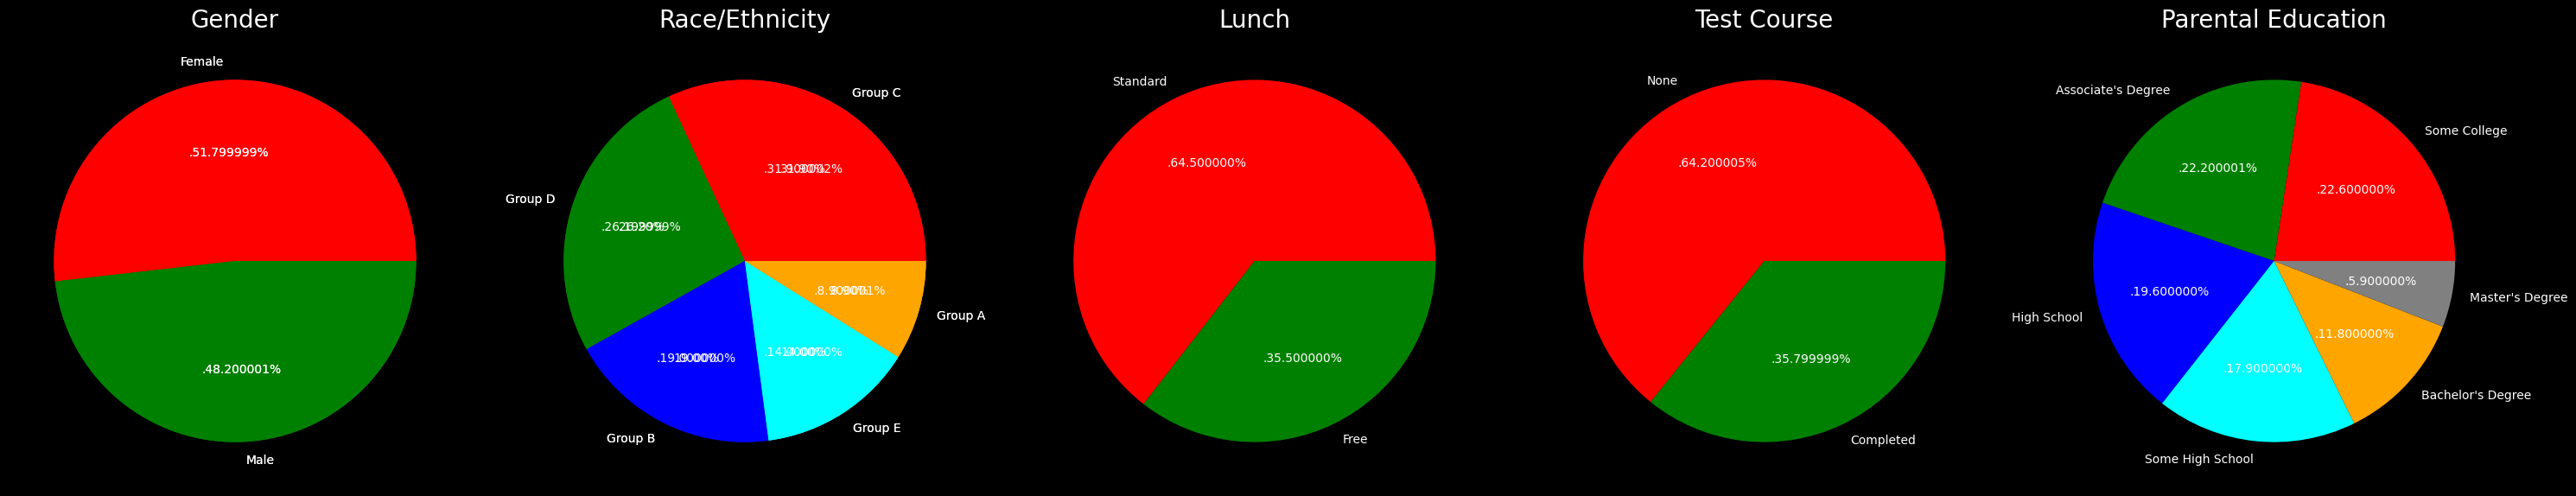

In [67]:
# 4.3 Multivariate analysis
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels = labels, autopct='.%2f%%')
plt.title('Gender', fontsize= 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors = color, labels = labels, autopct ='%.2f%%')
plt.title('Race/Ethnicity')
plt.axis('off')

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


**Insights**
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of Male and Female students is almost equal
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

C:\Users\ANKUR YADAV\AppData\Local\Temp\ipykernel_31656\4027653677.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)


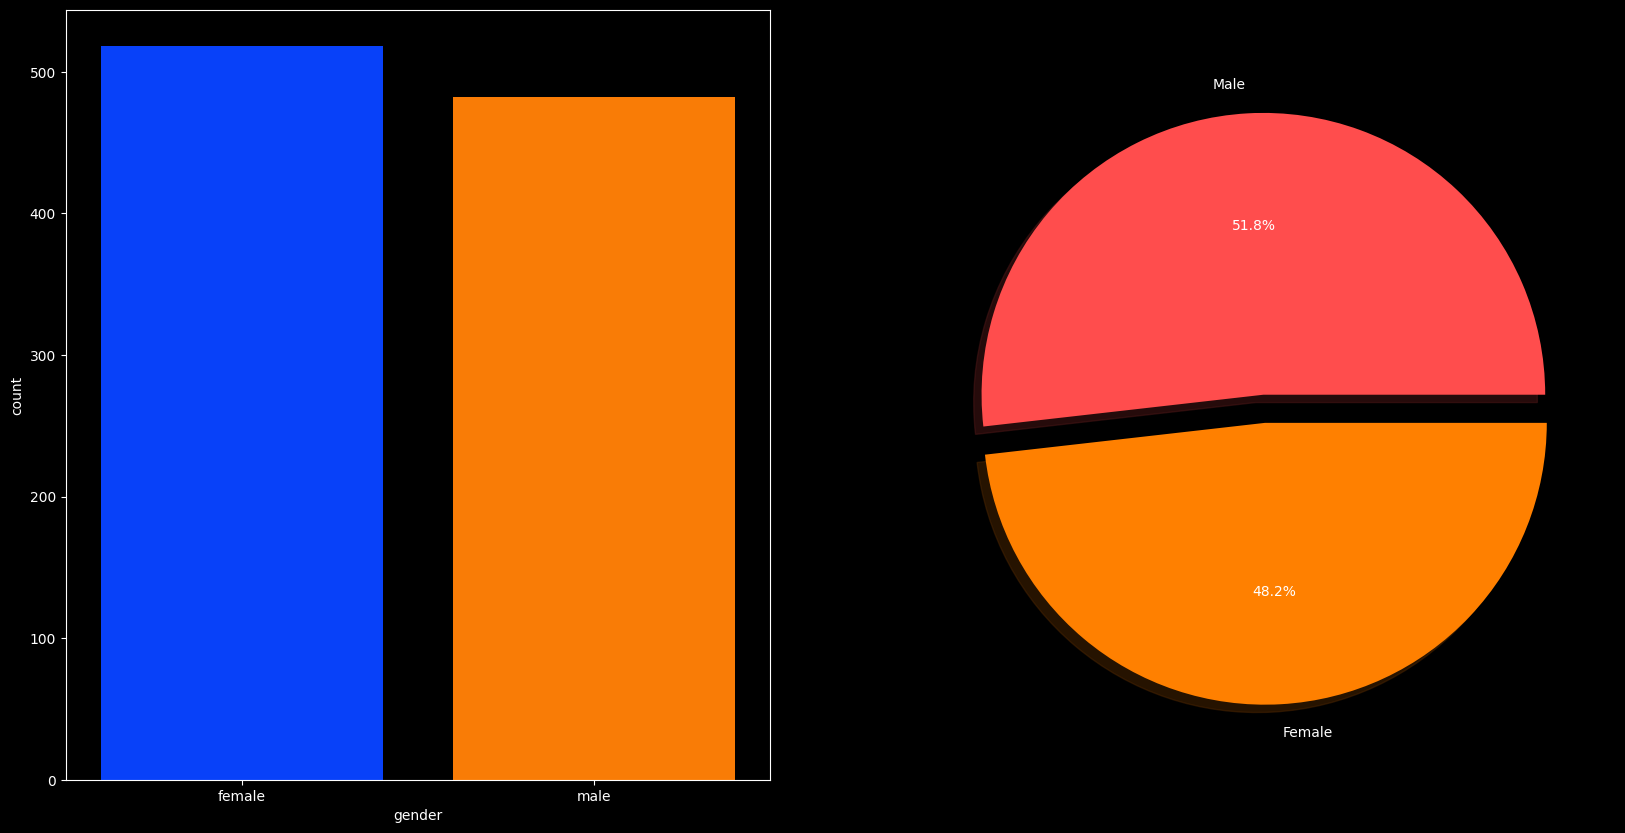

In [70]:
# 4.4 Feature Wise Visualization

# 4.4.1 GENDER COLUMN
# How is distribution of Gender ?
# Is gender has any impact on student's performance ?

# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


**Insights**
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [78]:
# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )
gender_group = data.groupby('gender').agg({'average': 'mean', 'math_score': 'mean'})
gender_group

,average,math_score
gender,,
female,69.569498,63.633205
male,65.837483,68.728216


C:\Users\ANKUR YADAV\AppData\Local\Temp\ipykernel_31656\2344496894.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
C:\Users\ANKUR YADAV\AppData\Local\Temp\ipykernel_31656\2344496894.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores = [gender_group['average'][1], gender_group['math_score'][1]]


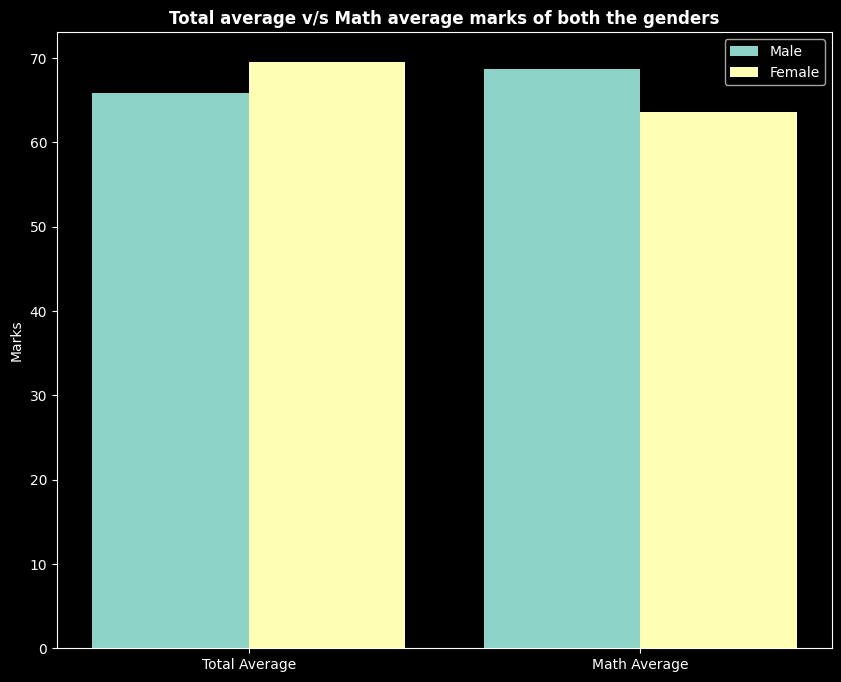

In [81]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**Insights**
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

C:\Users\ANKUR YADAV\AppData\Local\Temp\ipykernel_31656\2835086650.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['race_ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)


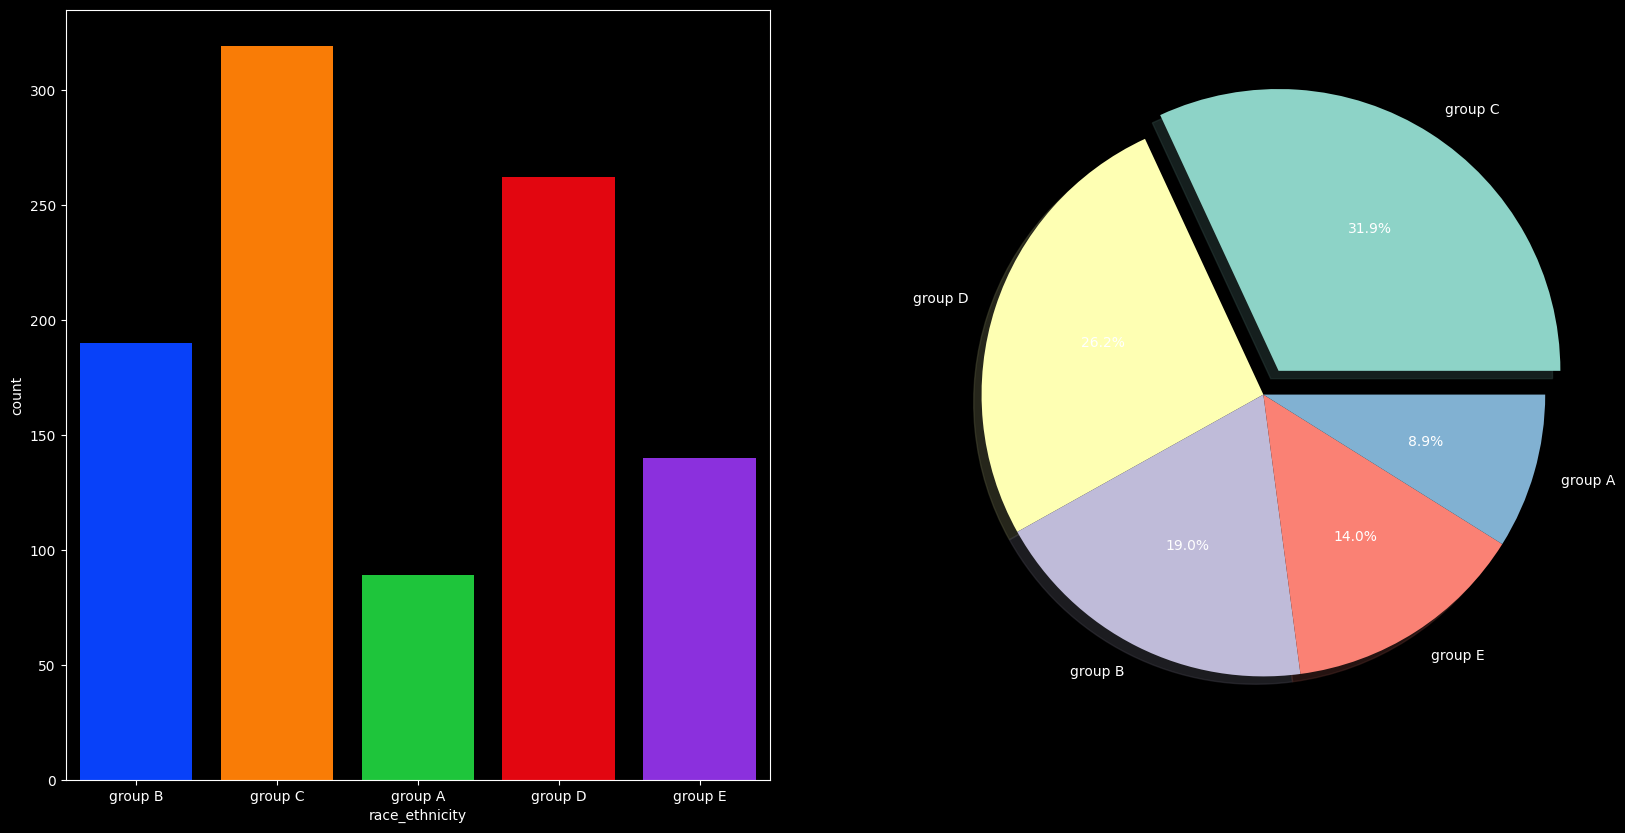

In [83]:
# 4.4.2 RACE/EHNICITY COLUMN
# How is Group wise distribution ?
# Is Race/Ehnicity has any impact on student's performance ?

# UNIVARIATE ANALYSIS ( How is Group wise distribution ?)
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race_ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['race_ethnicity'].value_counts(),labels=data['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

**Insights**
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

C:\Users\ANKUR YADAV\AppData\Local\Temp\ipykernel_31656\2584175273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\ANKUR YADAV\AppData\Local\Temp\ipykernel_31656\2584175273.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\ANKUR YADAV\AppData\Local\Temp\ipykernel_31656\2584175273.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

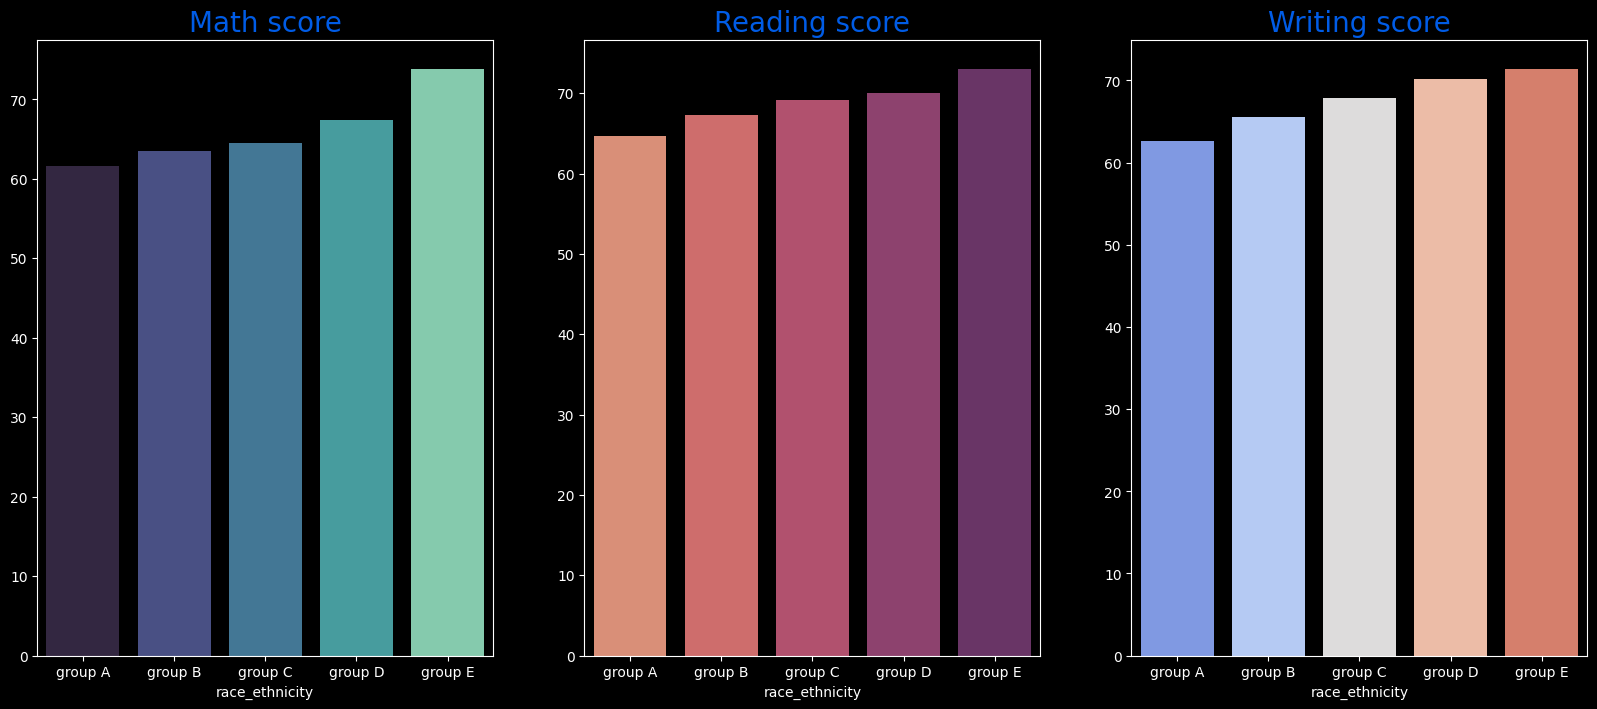

In [85]:
# BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

Group_data2=data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights**
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

C:\Users\ANKUR YADAV\AppData\Local\Temp\ipykernel_31656\3563223603.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['parental_level_of_education'], palette = 'Blues')


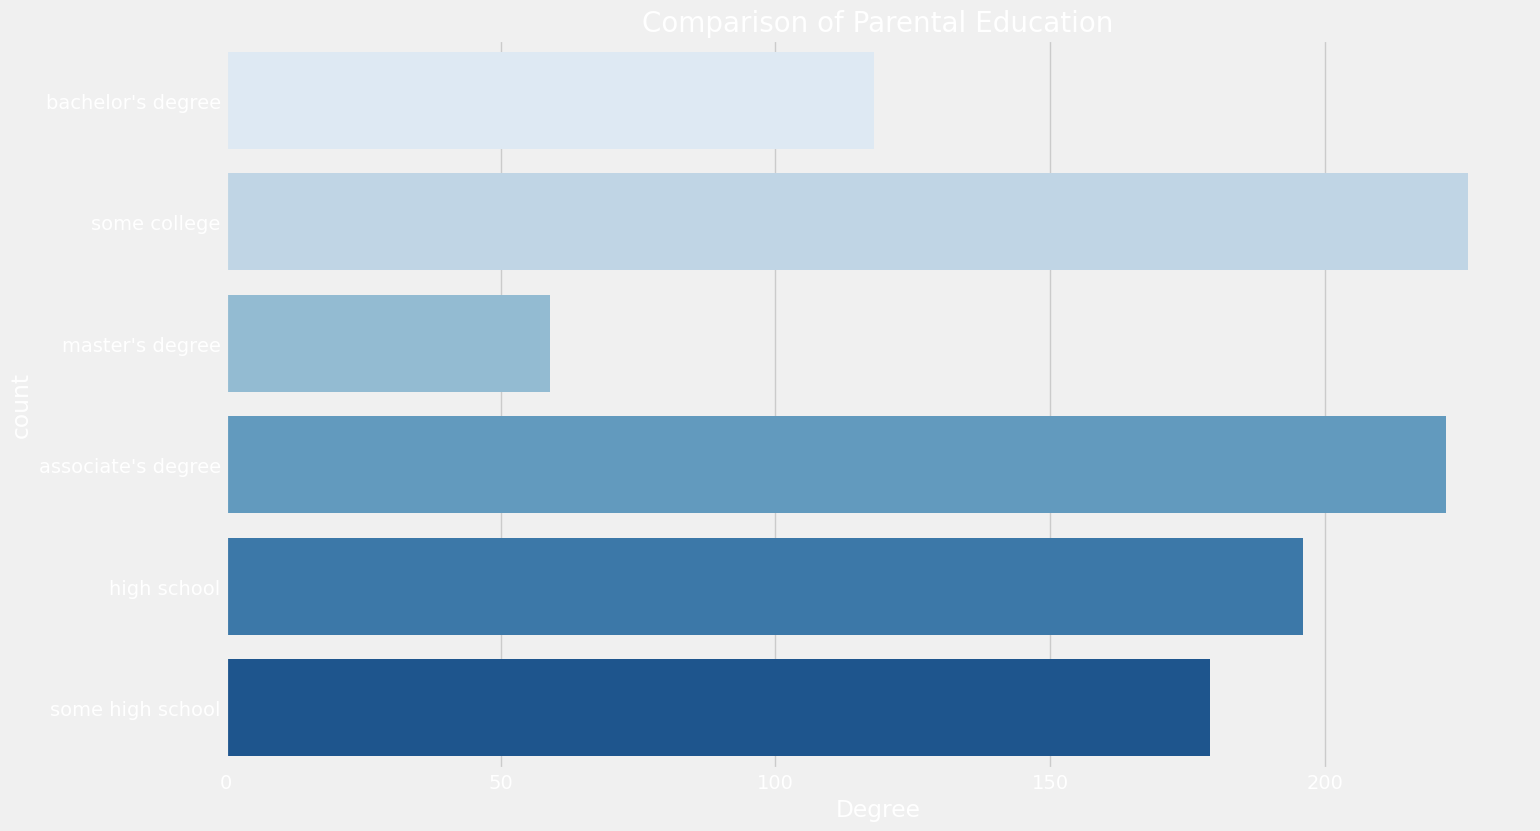

In [88]:
# 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
# What is educational background of student's parent ?
# Is parental education has any impact on student's performance ?

# UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Insights**
- Largest number of parents are from some college.

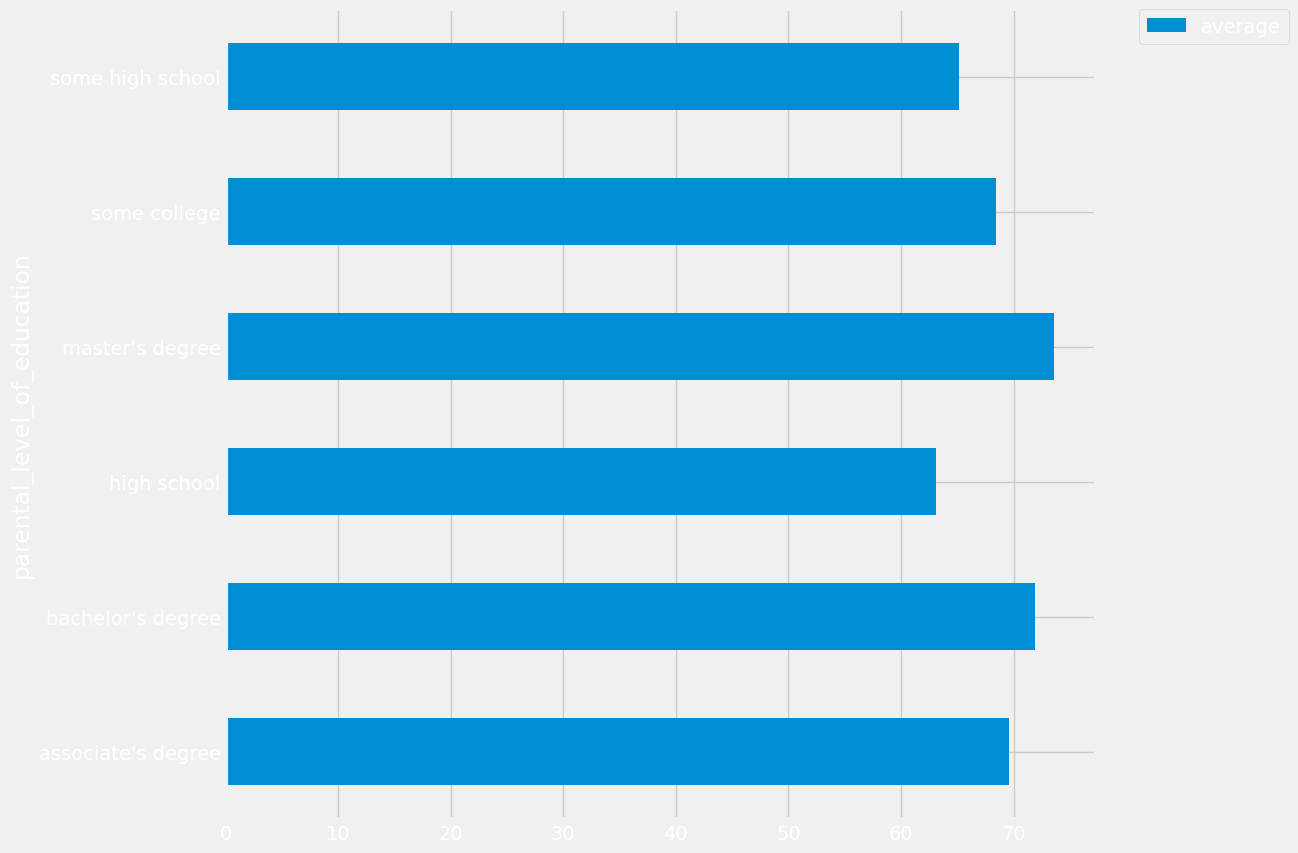

In [91]:
# BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )
data.groupby('parental_level_of_education').agg({'average':'mean'}).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**
- The score of student whose parents possess master and bachelor level education are higher than others.

C:\Users\ANKUR YADAV\AppData\Local\Temp\ipykernel_31656\927208861.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['lunch'], palette = 'PuBu')


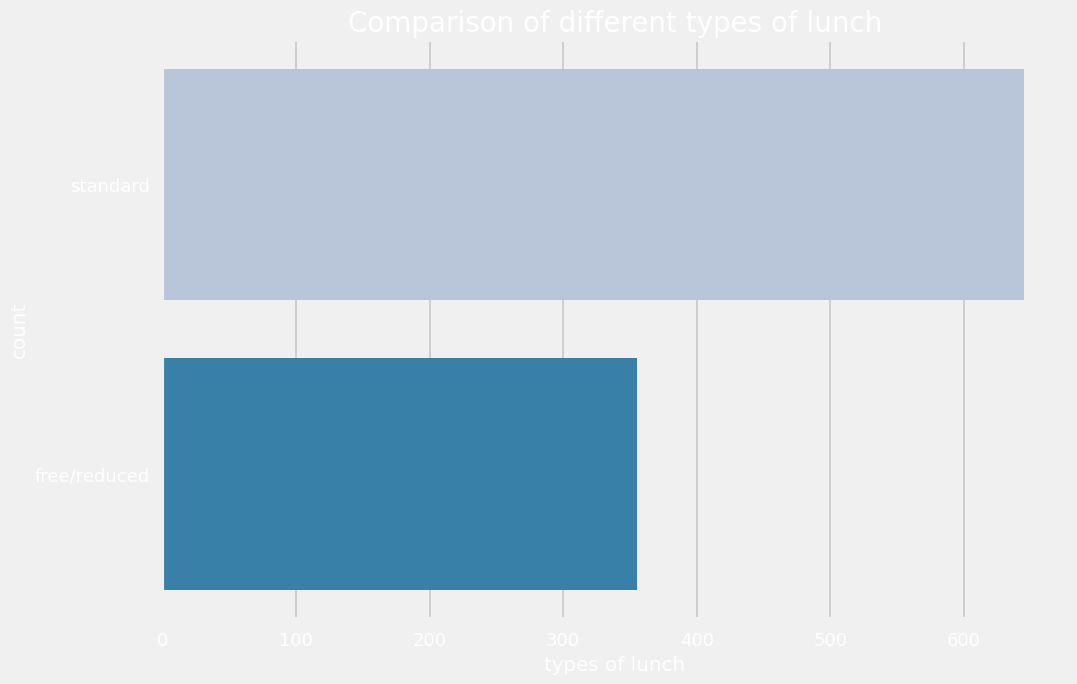

In [96]:
# 4.4.4 LUNCH COLUMN
# Which type of lunch is most common amoung students ?
# What is the effect of lunch type on test results?

# UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

**Insights**
- Students being served Standard lunch was more than free lunch

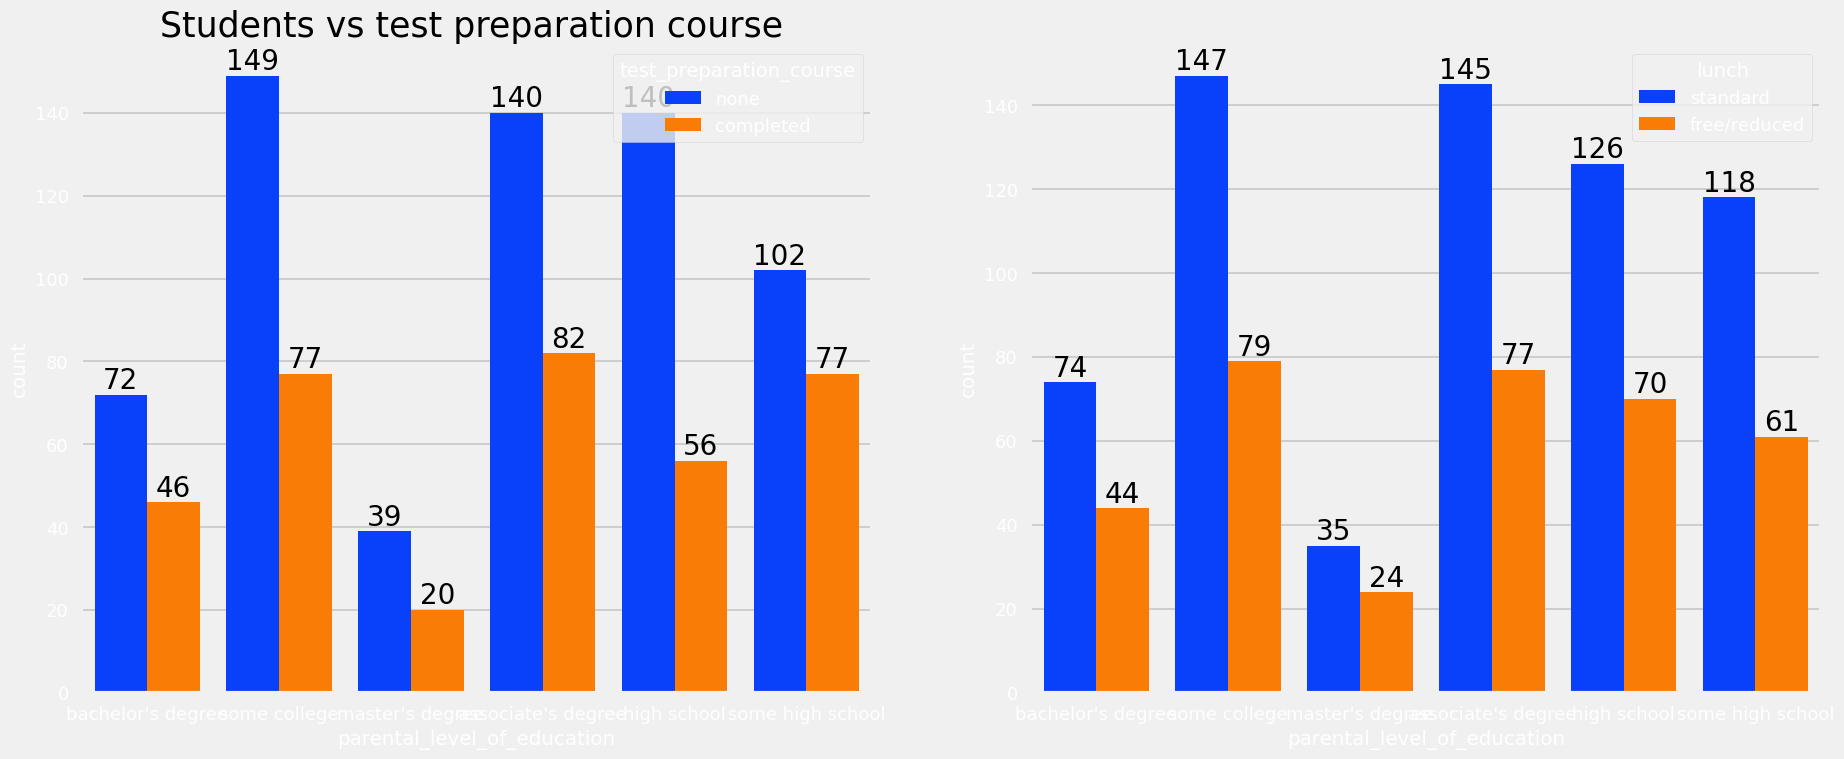

In [100]:
# BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

**Insights**
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

<Axes: xlabel='lunch', ylabel='writing_score'>

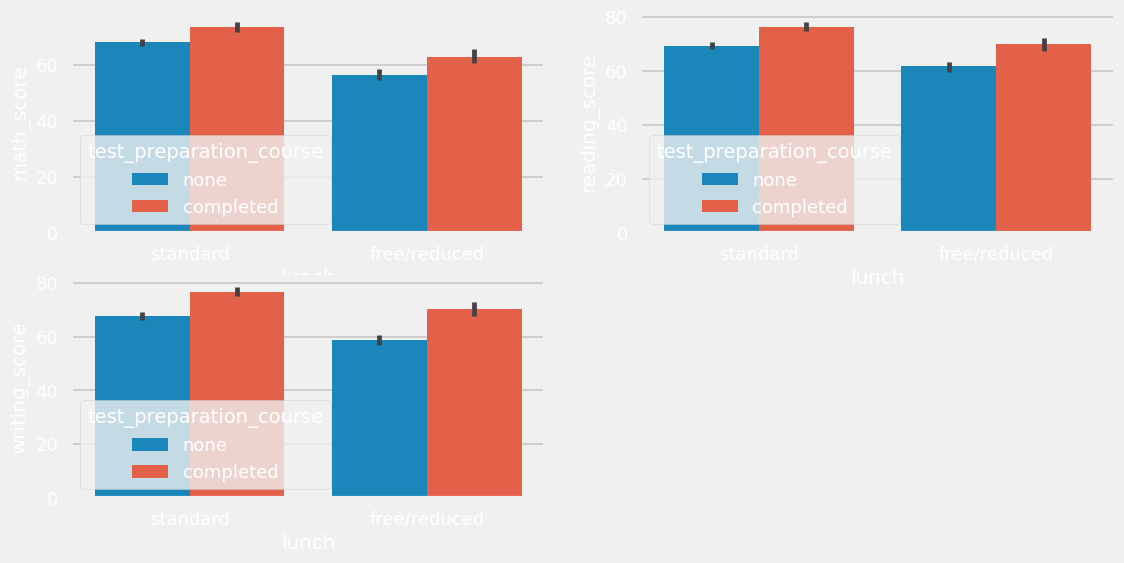

In [104]:
# 4.4.5 TEST PREPARATION COURSE COLUMN
# Which type of lunch is most common amoung students ?
# Is Test prepration course has any impact on student's performance ?

# BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data['lunch'], y=data['math_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=data['lunch'], y=data['reading_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=data['lunch'], y=data['writing_score'], hue=data['test_preparation_course'])

**Insights**
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

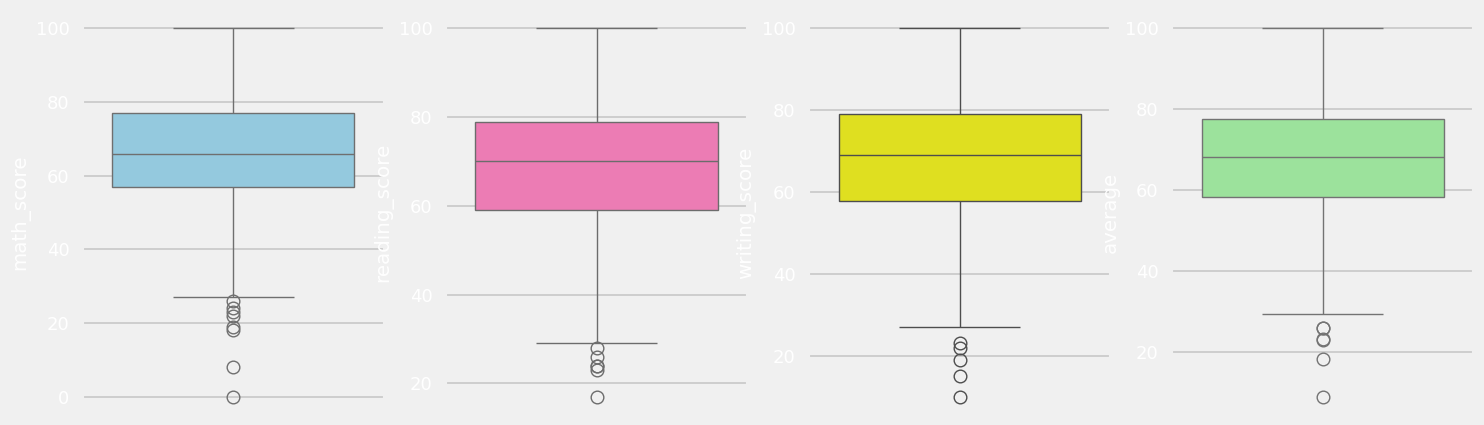

In [107]:
# 4.4.6 CHECKING OUTLIERS
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average'],color='lightgreen')
plt.show()

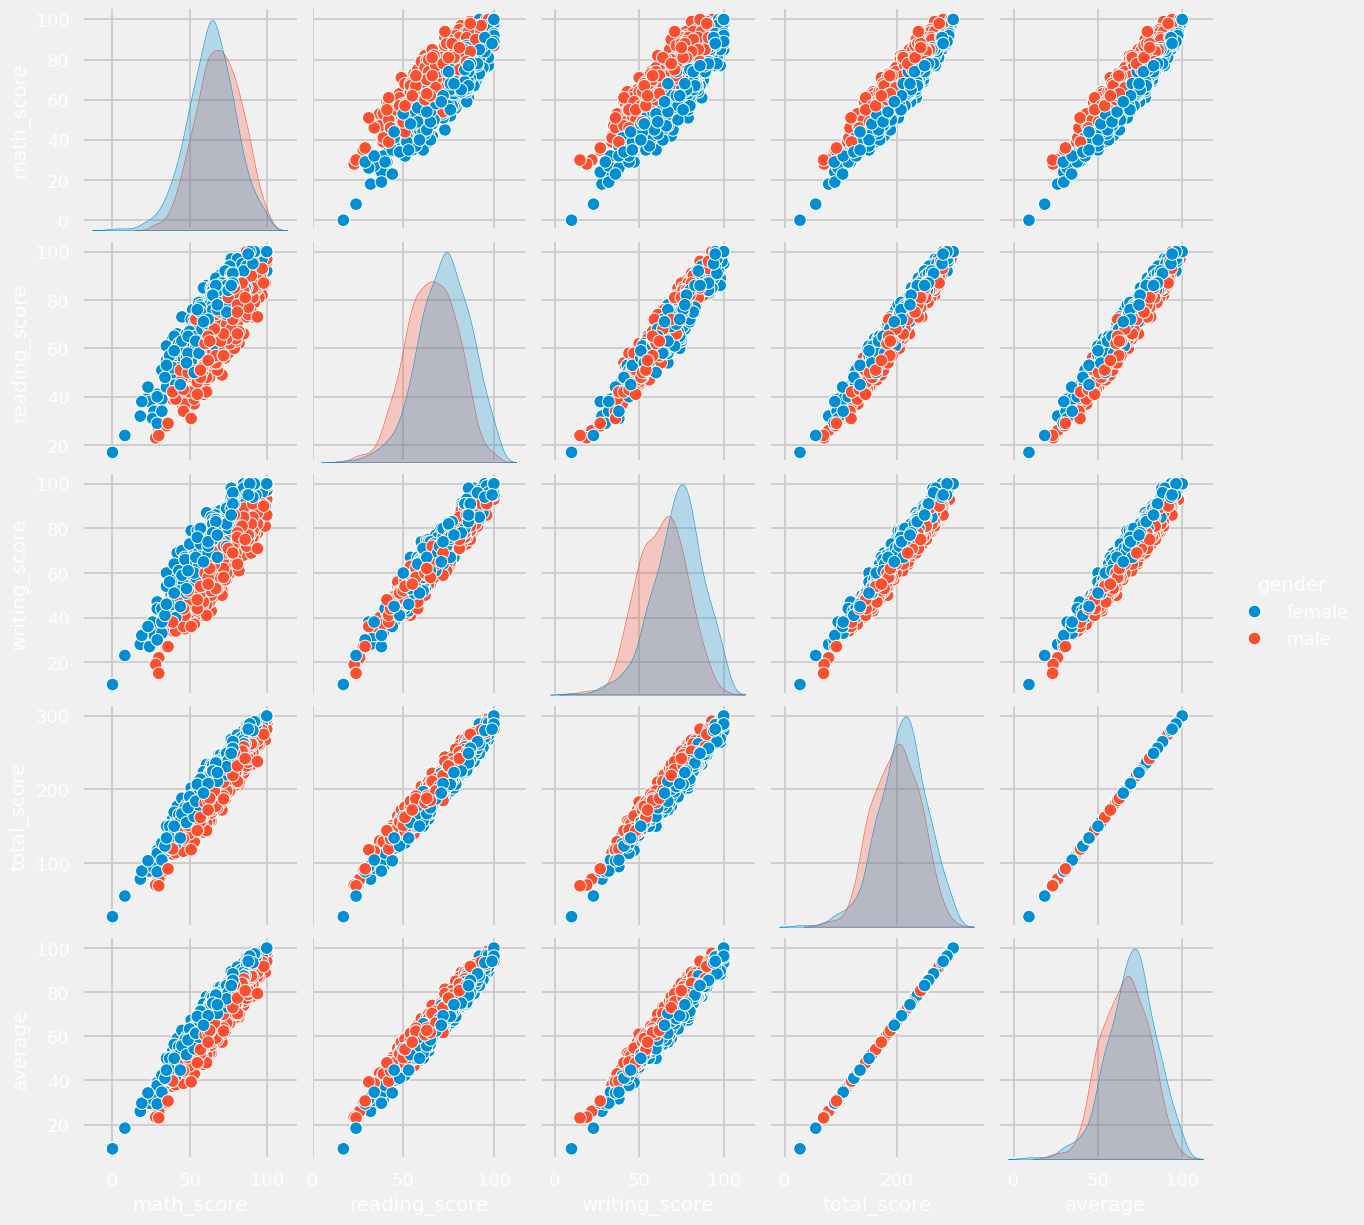

In [109]:
# 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT
sns.pairplot(data,hue = 'gender')
plt.show()

**Insights**
- From the above plot it is clear that all the scores increase linearly with each other.

In [110]:
# 5. Conclusions
# Student's Performance is related with lunch, race, parental level education
# Females lead in pass percentage and also are top-scorers
# Student's Performance is not much related with test preparation course
# Finishing preparation course is benefitial.